# Problem statement
It is a business critical requirement to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value). Identifying the most valuable RFM segments can capitalize on chance relationships in the data used for this analysis.


# Data Description:
InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

Description: Product (item) name. Nominal. 

Quantity: The quantities of each product (item) per transaction. Numeric. 

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated. 

UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

Country: Country name. Nominal, the name of the country where each customer resides.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# More about RFM analysis:

RFM stands for Recency, Frequency, Monetary value. This concept is basically used to divide the customers into different segmenets, like high-value customer, medium value custoemr or low-value customers and similarly others.

# Steps to follow:

1. Data collection and importation
2. Data cleaning and pre-processing
3. Cohort analysis
4. Model development- RFM Model

# 1. Data collection and importation

In [1]:
# import necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
data=pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.shape

(541909, 8)

There are 8 features and 5,41,909 data.

# 2. Data Cleaning and Pre-processing

In [4]:
# checking for the null and duplicate values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

For the description feature and customer ID there are only few missing values so deleting the null values in description feature and since customerID are the unique id given to each customer so there is no way we can impute the customer ID manually so dropping the null values in both features.

In [5]:
data=data.dropna()
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
data.shape

(406829, 8)

In [7]:
# data.to_csv('Retail_data.csv')

In [8]:
# descriptive analysis
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 3. Cohort analysis

In [9]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [11]:
# creating a cohort of months 
# extracting months from the Invoice date and assigning new feature called month
data['Month']=data['InvoiceDate'].dt.month

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12


In [13]:
month_groupby=data.groupby('Month')

Month: 12
Total customers for month 12 are: 1374


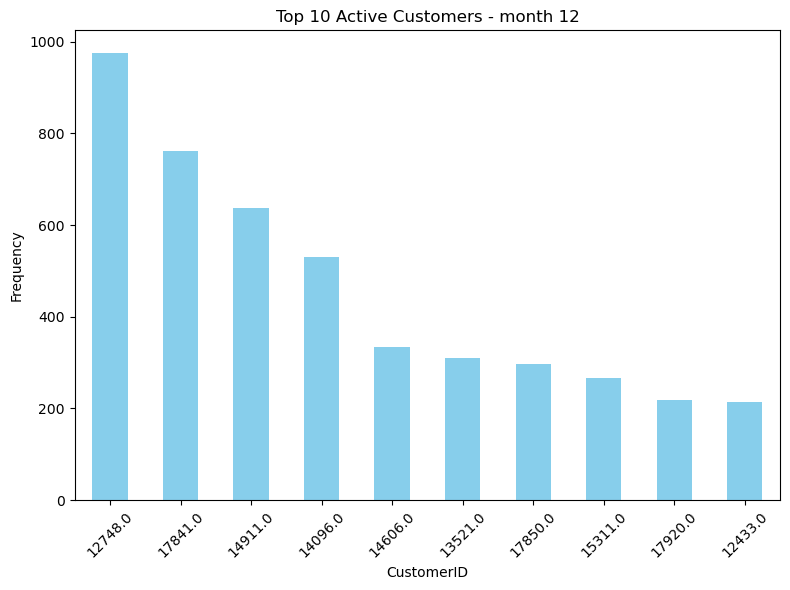

Month: 1
Total customers for month 1 are: 783


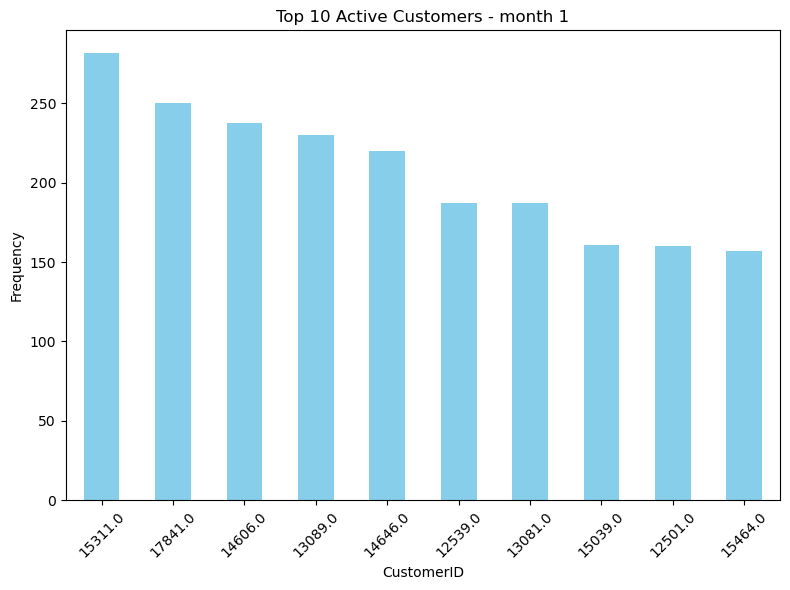

Month: 2
Total customers for month 2 are: 798


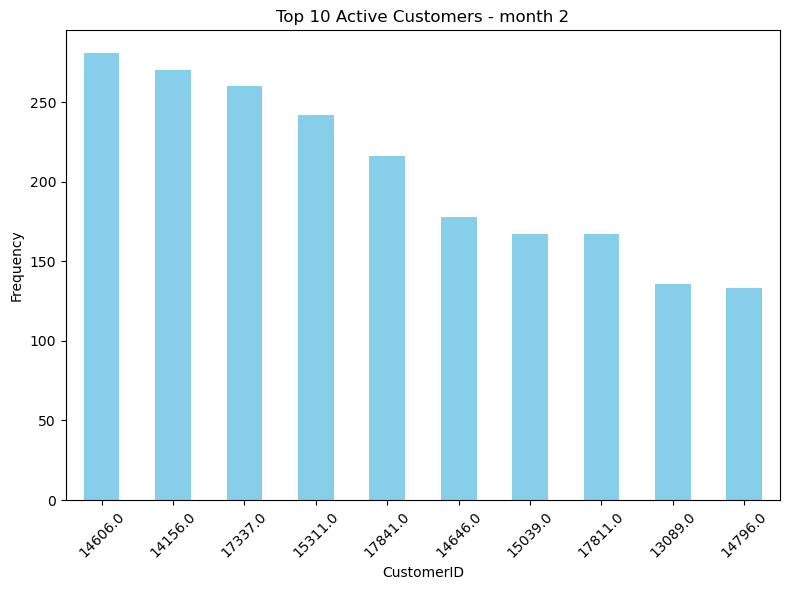

Month: 3
Total customers for month 3 are: 1020


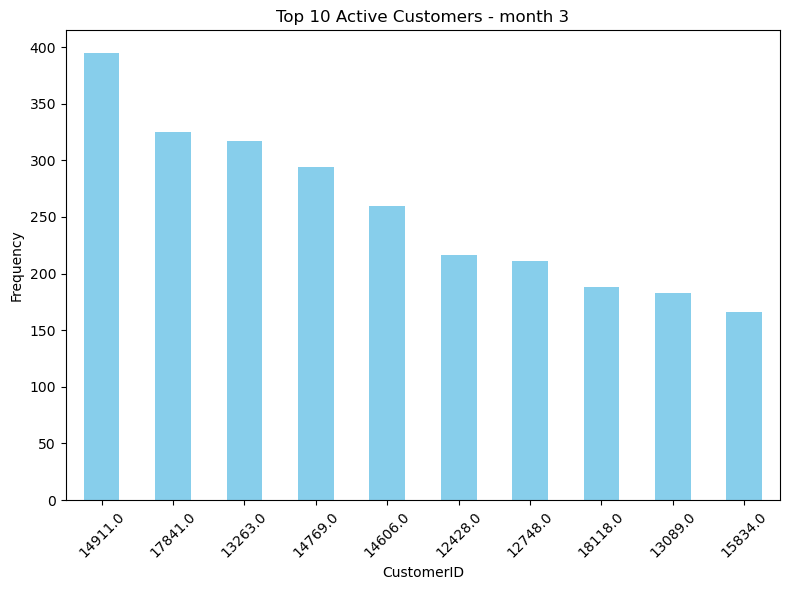

Month: 4
Total customers for month 4 are: 899


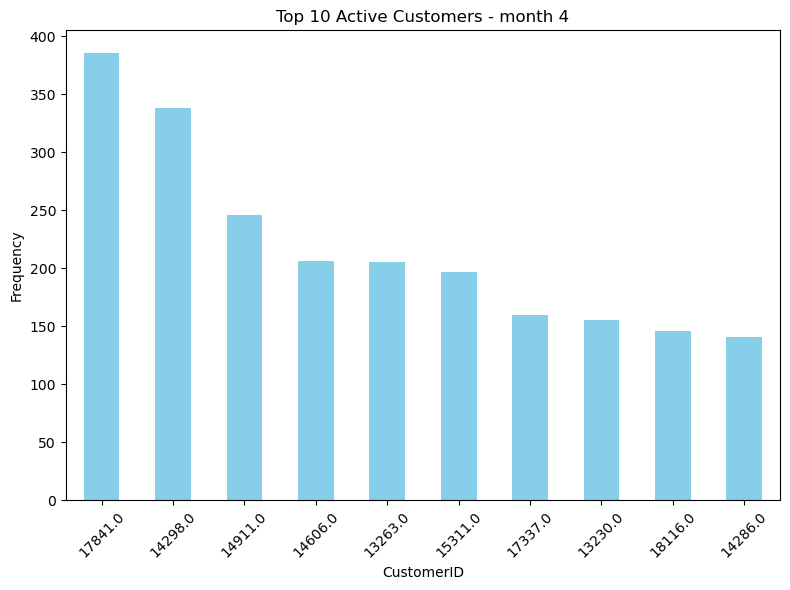

Month: 5
Total customers for month 5 are: 1079


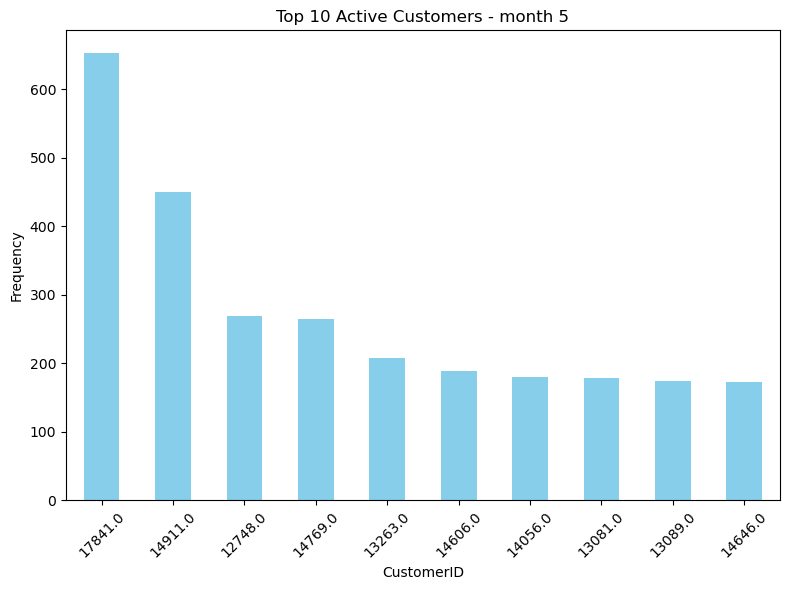

Month: 6
Total customers for month 6 are: 1051


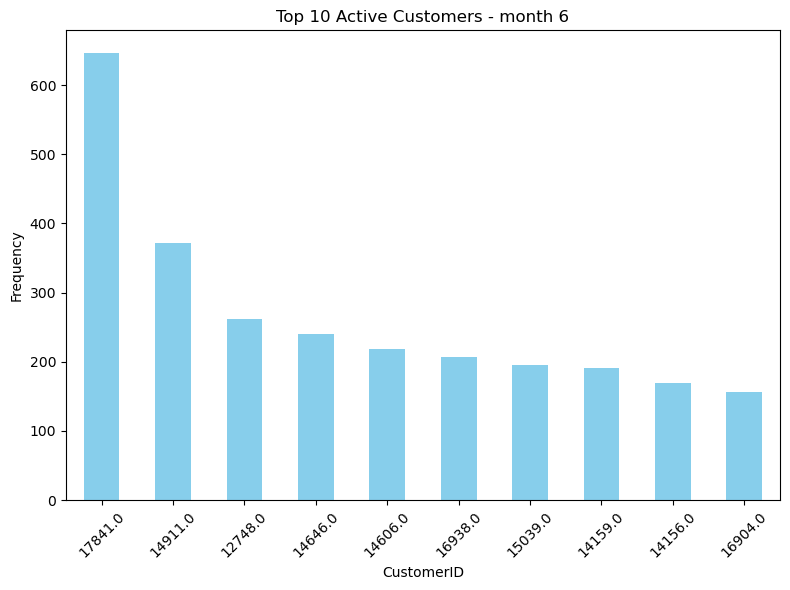

Month: 7
Total customers for month 7 are: 993


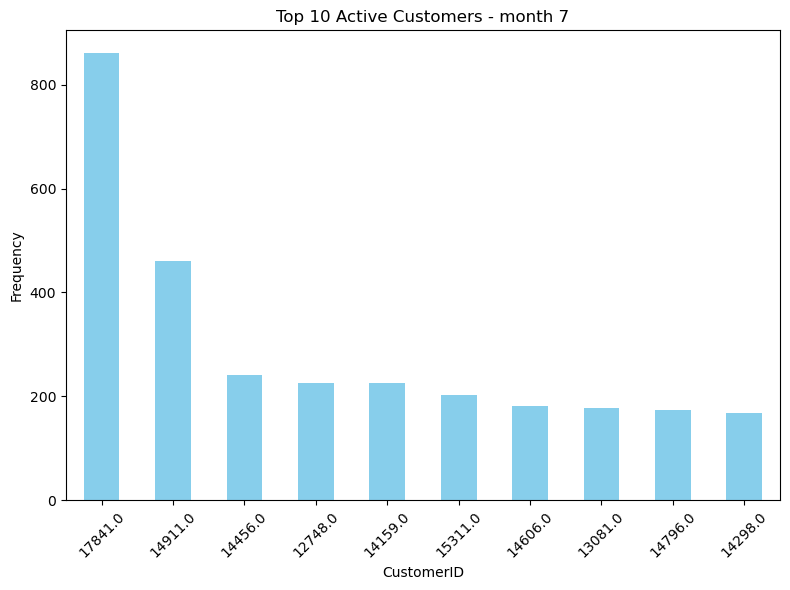

Month: 8
Total customers for month 8 are: 980


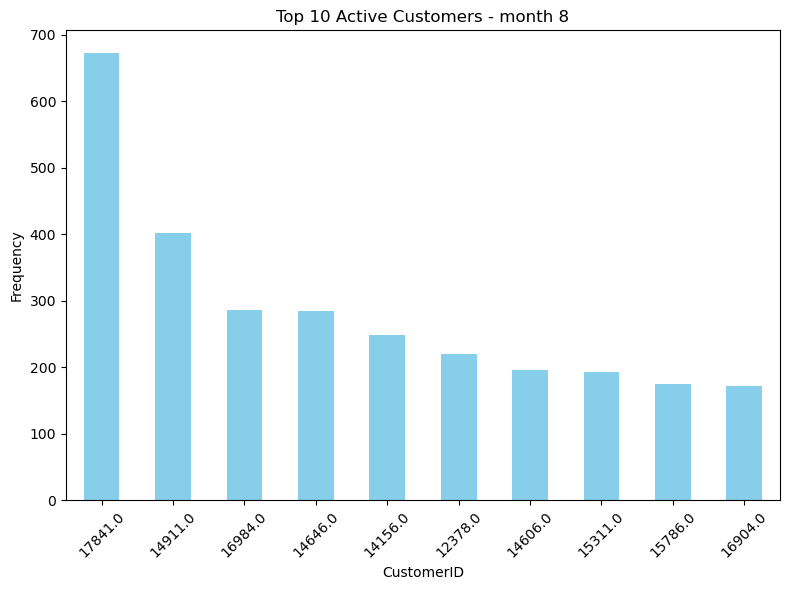

Month: 9
Total customers for month 9 are: 1302


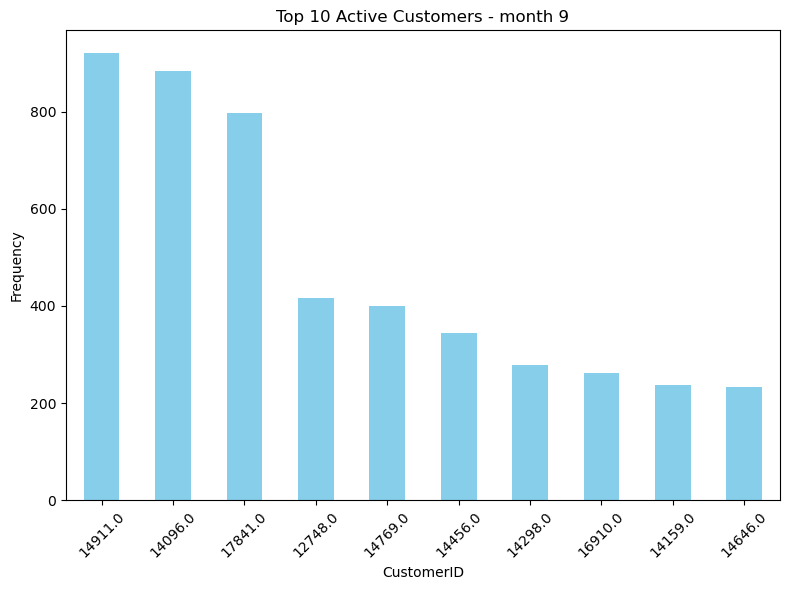

Month: 10
Total customers for month 10 are: 1425


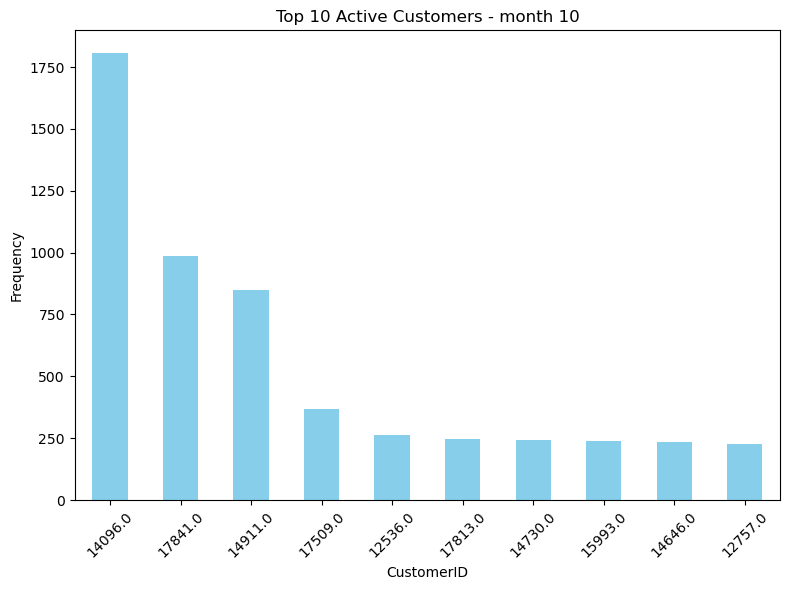

Month: 11
Total customers for month 11 are: 1711


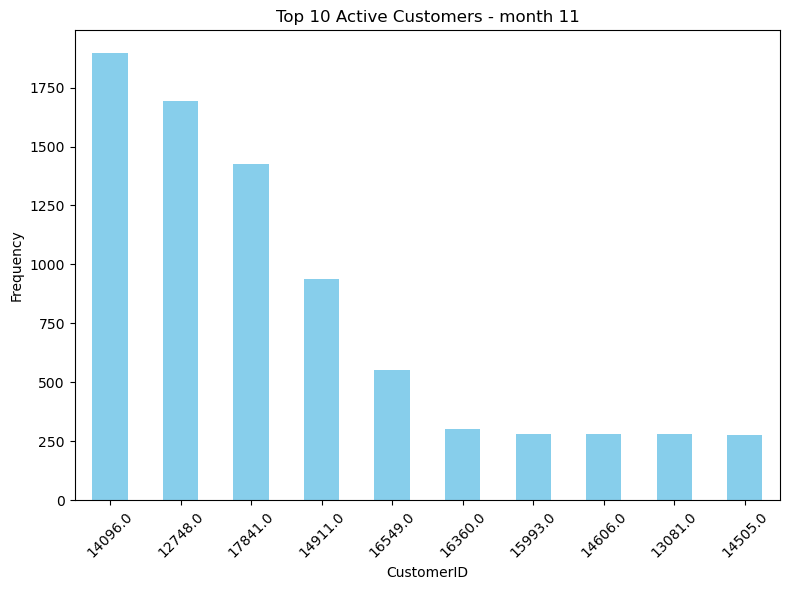

In [14]:
for month in data['Month'].unique():
    print(f"Month: {month}")
    get_data = month_groupby.get_group(month)
    print(f"Total customers for month {month} are: {len(get_data['CustomerID'].value_counts())}")
    
    # Plotting for each month
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    get_data['CustomerID'].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(f"Top 10 Active Customers - month {month}")
    plt.xlabel('CustomerID')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()

# Retention rate calculation by month

Since the data is from 01/12/2010 - 09/12/2011 Retention Rate will be calculated based on the number of active customer which were present in the month of 01/12/2010 and how many were there are in 01/11/2011. 

In [15]:
# making a copy of the original dataset for experimentation
data_copy=data.copy()

In [16]:
data_copy['Date']=data_copy['InvoiceDate'].dt.date

In [17]:
data_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01


In [18]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Month        406829 non-null  int64         
 9   Date         406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 34.1+ MB


In [19]:
# convert date into datetime format
data_copy['Date']=pd.to_datetime(data_copy['Date'])

In [20]:
# Counting the total customers who were present at the beginning of the sales month in the data
customer_at_start = data_copy.loc[(data_copy['Date'] >= '2010-12-01') & (data_copy['Date'] <= '2010-12-31')]['CustomerID'].nunique()
# for the customer count for the end I am going to count the customer who are active in the date from 2011-12-09
customer_at_end=data_copy.loc[(data_copy['Date'] >= '2011-11-01') & (data_copy['Date'] <= '2011-12-09')]['CustomerID'].nunique()


In [21]:
customer_at_start, customer_at_end

(948, 1954)

In [22]:
# calculating the retention rate
new_customer_acquired=customer_at_end-customer_at_start
retention_rate=((customer_at_end - new_customer_acquired)/customer_at_start)*100
# print the retention rate 
print(f"The retention rate for the whole period is:{retention_rate:.2f}%")

The retention rate for the whole period is:100.00%


It was impressive that the retention rate was 100% which means that there is 0% churn rate.



# 4. Model development

For RFM analysis first step is to calculate the Recency, then Frequency and Monetary.

Recency: How recently has the customer made a transaction

Frequency: How frequent is the customer in ordering/buying some product

Monetary: How much does the customer spend on purchasing products.

In [23]:
data_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01


# calculating the recency

In [24]:

df_recency=data_copy.groupby(by='CustomerID', as_index=False)['Date'].max()

df_recency.columns=['CustomerID','LastPurchaseDate']
recent_date=df_recency['LastPurchaseDate'].max()
df_recency['Recency']=df_recency['LastPurchaseDate'].apply(lambda x:(recent_date - x).days)
df_recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


# calculating Frequency

In [25]:
frequency_df = data_copy.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['Date'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [26]:
data_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01


# calculating the Monetary value

In [27]:

data_copy['Total'] = data_copy['UnitPrice']*data_copy['Quantity']
monetary_df = data_copy.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


# Merging all three columns in one Data frame


In [28]:
rf_df=df_recency.merge(frequency_df, on='CustomerID')
rfm_df=rf_df.merge(monetary_df, on='CustomerID').drop(columns='LastPurchaseDate')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


Now we have all three values in one dataframe

To rank the customer based on the RFM values here I am going to divide the dataset into 5 quartiles to do that I have here used pandas qcut function which will automatically divide the data into 5 quartile and assign the given labels based on their recency, frequency and Monetary values.

In [29]:
r=pd.qcut(rfm_df['Recency'], q=5, labels=range(5,0,-1)) 
f=pd.qcut(rfm_df['Frequency'], q=5, labels=range(1,6)) 
m=pd.qcut(rfm_df['Monetary'], q=5, labels=range(1,6))

rfm=rfm_df.assign(R=r.values, F=f.values, M=m.values)
print(rfm)

      CustomerID  Recency  Frequency  Monetary  R  F  M
0        12346.0      325          2      0.00  1  1  1
1        12347.0        2        182   4310.00  5  5  5
2        12348.0       75         31   1797.24  2  3  4
3        12349.0       18         73   1757.55  4  4  4
4        12350.0      310         17    334.40  1  2  2
...          ...      ...        ...       ... .. .. ..
4367     18280.0      277         10    180.60  1  1  1
4368     18281.0      180          7     80.82  1  1  1
4369     18282.0        7         13    176.60  5  1  1
4370     18283.0        3        721   2094.88  5  5  5
4371     18287.0       42         70   1837.28  3  4  4

[4372 rows x 7 columns]


Here we have got RFM values:
    
Note:

    * For R value higher value means most recent customer lower means customer who bought something after long time or they didn't but it
    
    * For F and M higher score means more recent and more spending

In [30]:
# Now here we will calculate the RFM score at first segmenting the RFM quartile values to create RFM segments
rfm['RFM_segment']= rfm.R.astype(str)+rfm.F.astype(str)+rfm.M.astype(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_segment
0,12346.0,325,2,0.00,1,1,1,111
1,12347.0,2,182,4310.00,5,5,5,555
2,12348.0,75,31,1797.24,2,3,4,234
3,12349.0,18,73,1757.55,4,4,4,444
4,12350.0,310,17,334.40,1,2,2,122


We have our RFM segments to calculate the RFM score here we will count the unique segments.

In [31]:
rfm_quique_count=rfm.groupby('RFM_segment')['RFM_segment'].nunique()
print(rfm_quique_count.sum())

119


There are 119 unique RFM segments

In [32]:
# calculate the RFM score
rfm['RFM_score']=rfm[['R','F','M']].sum(axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score
0,12346.0,325,2,0.00,1,1,1,111,3
1,12347.0,2,182,4310.00,5,5,5,555,15
2,12348.0,75,31,1797.24,2,3,4,234,9
3,12349.0,18,73,1757.55,4,4,4,444,12
4,12350.0,310,17,334.40,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,10,180.60,1,1,1,111,3
4368,18281.0,180,7,80.82,1,1,1,111,3
4369,18282.0,7,13,176.60,5,1,1,511,7
4370,18283.0,3,721,2094.88,5,5,5,555,15


# let's analyse the segments
since the range of value of R, F and M are in the 1 to 5 which means the most valueable customer will be the customer whose RFM score is either 555 or RFM score of 15

In [33]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary,RFM_score
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.581199,91.858188,1898.459701,8.997941
std,1722.390705,100.772139,229.223566,8219.345141,3.605804
min,12346.000000,0.000000,1.000000,-4287.630000,3.000000
25%,13812.750000,16.000000,17.000000,293.362500,6.000000
50%,15300.500000,50.000000,41.000000,648.075000,9.000000
75%,16778.250000,143.000000,99.250000,1611.725000,12.000000
max,18287.000000,373.000000,7812.000000,279489.020000,15.000000


Let's find out the different segments of customer

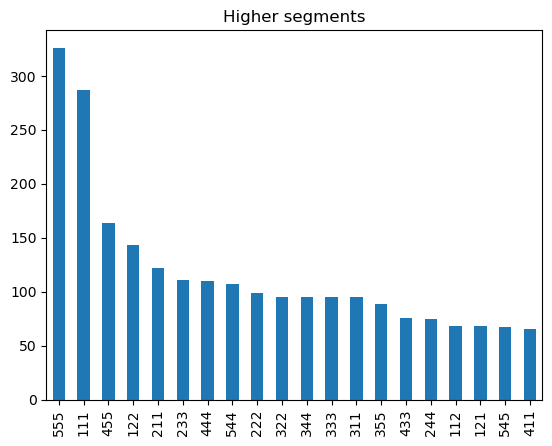

In [34]:
rfm['RFM_segment'].value_counts(ascending=False).head(20).plot(kind='bar')
plt.title('Higher segments')
plt.show()

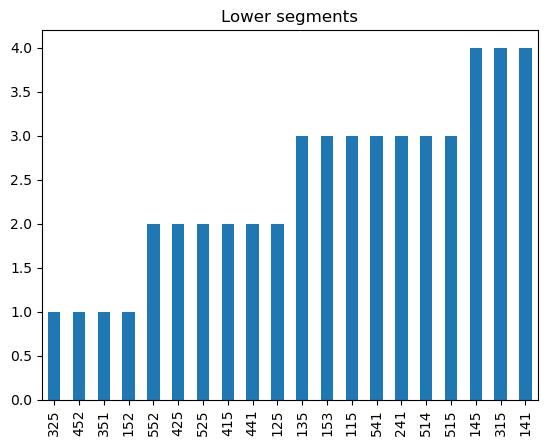

In [35]:
rfm['RFM_segment'].value_counts(ascending=True).head(20).plot(kind='bar')
plt.title('Lower segments')
plt.show()

# using clustering techniques to group the cluster based on the features

steps: 
    
* Data preparation
* Finding the optimum clusters 
* Analysing the clusters

# Data preparation

In this step since the data range of variables shows large variation it is necessary to normalize the data. Since we are using K-means it is distance based so it is necessary to adjust the common range to avoid building biased model.

In [36]:
# import required libaries from scikit learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In order to perform clustering here I have taken only few features R,F and M

In [37]:
filterd_data=rfm[['R','F','M']]
filterd_data

,R,F,M
0,1,1,1
1,5,5,5
2,2,3,4
3,4,4,4
4,1,2,2
...,...,...,...
4367,1,1,1
4368,1,1,1
4369,5,1,1
4370,5,5,5


In [38]:
# initializing the standardScaler
scaler=StandardScaler()
rfm_normalizedDf=pd.DataFrame(scaler.fit_transform(filterd_data))
rfm_normalizedDf.columns=['n_Recency','n_Frequency','n_Monetary']
rfm_normalizedDf.describe()

,n_Recency,n_Frequency,n_Monetary
count,4.372000e+03,4.372000e+03,4372.000000
mean,2.794167e-17,2.849200e-17,0.000000
std,1.000114e+00,1.000114e+00,1.000114
min,-1.419309e+00,-1.390071e+00,-1.413890
25%,-7.152906e-01,-6.886987e-01,-0.706945
50%,-1.127203e-02,1.267347e-02,0.000000
75%,6.927466e-01,7.140456e-01,0.706945
max,1.396765e+00,1.415418e+00,1.413890


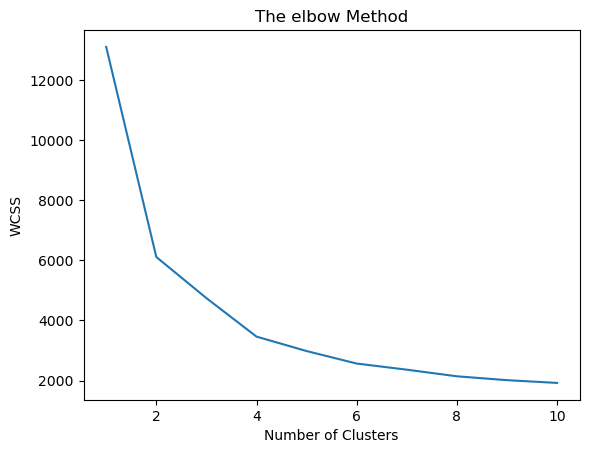

In [39]:
# for finding the optimum number of cluster here I am using elbow method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_normalizedDf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

As shown in the above chart the elbow was formed at cluster 4

In [40]:
# using the cluster 4 to create cluster in the data
kmeans=KMeans(n_clusters=4)
kmeans.fit(rfm_normalizedDf)


KMeans(n_clusters=4)

In [41]:
cluster=kmeans.labels_

In [42]:
# creating and assigning the cluster number to their correspondin values
rfm['Cluster']=cluster
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,Cluster
0,12346.0,325,2,0.00,1,1,1,111,3,0
1,12347.0,2,182,4310.00,5,5,5,555,15,1
2,12348.0,75,31,1797.24,2,3,4,234,9,3
3,12349.0,18,73,1757.55,4,4,4,444,12,1
4,12350.0,310,17,334.40,1,2,2,122,5,0
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,10,180.60,1,1,1,111,3,0
4368,18281.0,180,7,80.82,1,1,1,111,3,0
4369,18282.0,7,13,176.60,5,1,1,511,7,2
4370,18283.0,3,721,2094.88,5,5,5,555,15,1


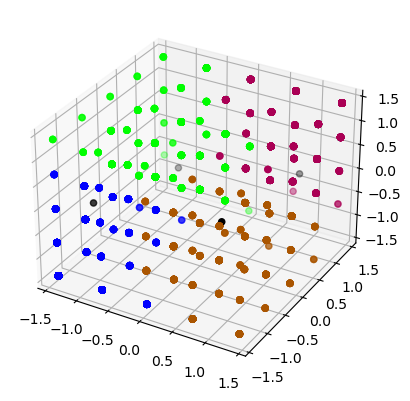

In [43]:
centers=kmeans.cluster_centers_
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(rfm_normalizedDf['n_Recency'],rfm_normalizedDf['n_Frequency'],rfm_normalizedDf['n_Monetary'], cmap='brg', c=kmeans.predict(rfm_normalizedDf))
ax.scatter(centers[:,0], centers[:,1], c='black')
plt.show()


In [44]:
# now we have got the cluster let's analyse the clusters
# grouping the data based on the clusters
grouped_cluster=rfm.groupby('Cluster').agg({'Recency':'mean','Frequency':'mean','Monetary':'mean'})

print(grouped_cluster)

            Recency   Frequency     Monetary
Cluster                                     
0        202.896552   15.669607   266.207957
1         16.227790  221.646925  4835.016105
2         26.832207   27.484234   459.558423
3        111.067391   71.466304  1295.978698


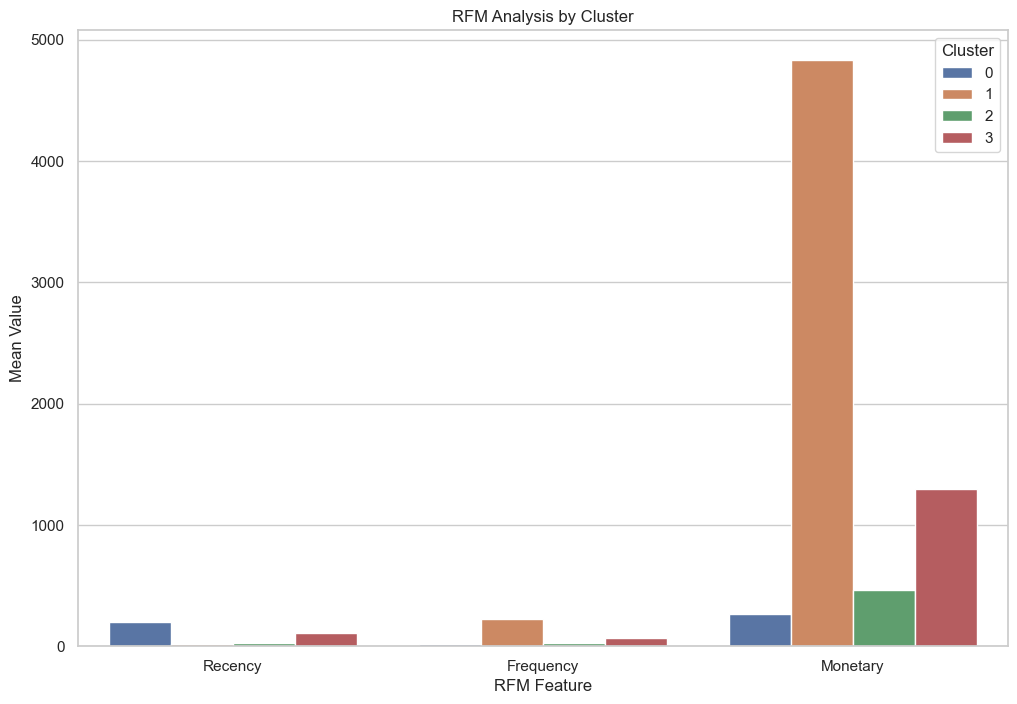

0    1247
1    1317
2     888
3     920
Name: Cluster, dtype: int64


In [45]:
# Plot histograms for each RFM feature within each cluster
rfm_melted = rfm.melt(id_vars=['Cluster'], value_vars=['Recency', 'Frequency', 'Monetary'])

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='variable', y='value', hue='Cluster', data=rfm_melted, ci=None)
plt.title('RFM Analysis by Cluster')
plt.xlabel('RFM Feature')
plt.ylabel('Mean Value')
plt.legend(title='Cluster')
plt.show()

# Compare the size of each cluster
cluster_sizes = rfm['Cluster'].value_counts().sort_index()
print(cluster_sizes)

As shown in the above chart and stats we can say that:
    
* cluster 0:
    * Recency: The average time since the last purchase in this cluster is approximately 29 days.
    * Frequency: The average frequency of purchases is around 26 times
    * Monetary: The average monetary value of purchase is approximately £428.37
    
    
* cluster 1:
    * Recency: The average time since the last purchase in this cluster is approximately 16 days which indicates that the customer in this cluster tends to make more frequenct purcases.
    * Frequency: The average frequency of purchases is around 222 times which indicates that this cluster customer makes large number of purchases.
    * Monetary: The average monetary value of purchase is approximately £ 4835.02 which means that the customer in this cluster are high spender and contribute significantly to revenue. 
    
    
* cluster 2:
    * Recency: The average time since the last purchase in this cluster is approximately 111 days which means that there is a longer gap in between purchases.
    * Frequency: The average frequency of purchases is around 71 times which means the customer in this cluster makes moderate number of purchases.
    * Monetary: The average monetary value of purchase is approximately £1296 which suggest that customer in  this cluster spends a moderate amount on purchases.
    
    
    
* cluster 3:
    * Recency: The average time since the last purchase in this cluster is approximately 215 days which means that there is a longer gap between the customer purchases.
    * Frequency: The average frequency of purchases is around 16 times which is relatively low as compare to other clusters.
    * Monetary: The average monetary value of purchase is approximately £277 which indicates that customer in this cluster spend less on purchases.

As shown in the above chart cluster 1 hass more number of customers as compare to other

Giving labels to each customer based on the behaviour

For cluster 0 → New customer

Cluster 1  →  High-value customer

Cluster 2  →  Churned Customer

cluster 3  →  Low-value Customer

In [46]:
# create function to categorize customer based on the clusters
def categorized_customer(clusters):
    if clusters==0:
        return 'New customer'
    elif clusters==1:
        return 'High-Value Customer'
    elif clusters==2:
        return 'Churned Customer'
    else:
        return 'Low-value Customer'
  
rfm['CustomerCategory']=rfm['Cluster'].apply(categorized_customer)

In [47]:
rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,Cluster,CustomerCategory
0,12346.0,325,2,0.00,1,1,1,111,3,0,New customer
1,12347.0,2,182,4310.00,5,5,5,555,15,1,High-Value Customer
2,12348.0,75,31,1797.24,2,3,4,234,9,3,Low-value Customer
3,12349.0,18,73,1757.55,4,4,4,444,12,1,High-Value Customer
4,12350.0,310,17,334.40,1,2,2,122,5,0,New customer
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,10,180.60,1,1,1,111,3,0,New customer
4368,18281.0,180,7,80.82,1,1,1,111,3,0,New customer
4369,18282.0,7,13,176.60,5,1,1,511,7,2,Churned Customer
4370,18283.0,3,721,2094.88,5,5,5,555,15,1,High-Value Customer


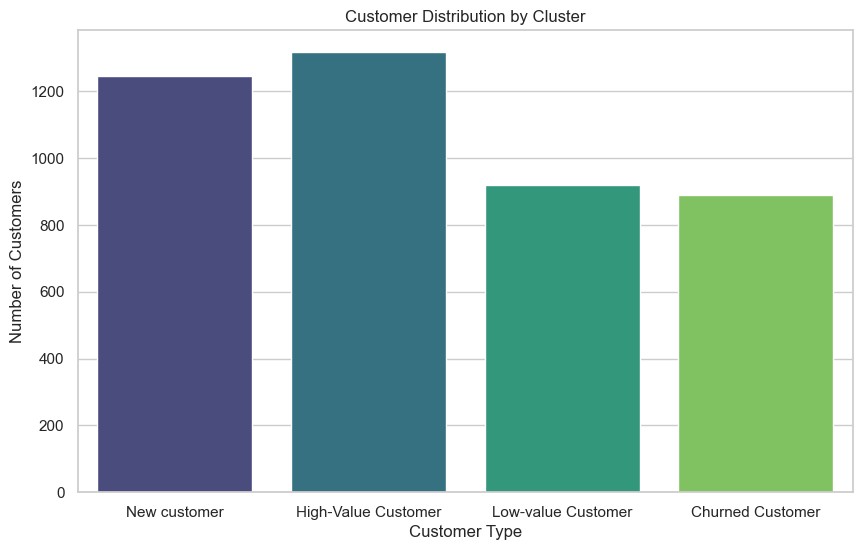

In [48]:
# Plot the distribution of customers in each cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='CustomerCategory', data=rfm, palette='viridis')
plt.title('Customer Distribution by Cluster')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.show()

In [49]:
cluster_3=rfm[rfm['Cluster']==3]

In [50]:
rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M',
       'RFM_segment', 'RFM_score', 'Cluster', 'CustomerCategory'],
      dtype='object')

In [51]:
data_copy.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'Date', 'Total'],
      dtype='object')

In [52]:
final_sales_data=pd.merge(data_copy, rfm, on ='CustomerID', suffixes=('_data_copy','_rfm'), how='inner')
final_sales_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Date,...,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,Cluster,CustomerCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010-12-01,...,302,309,5288.63,1,5,5,155,11,3,Low-value Customer
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01,...,302,309,5288.63,1,5,5,155,11,3,Low-value Customer
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010-12-01,...,302,309,5288.63,1,5,5,155,11,3,Low-value Customer
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01,...,302,309,5288.63,1,5,5,155,11,3,Low-value Customer
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010-12-01,...,302,309,5288.63,1,5,5,155,11,3,Low-value Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,12,2011-12-09,...,0,38,848.55,5,3,3,533,11,2,Churned Customer
406825,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011-12-09,...,0,38,848.55,5,3,3,533,11,2,Churned Customer
406826,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011-12-09,...,0,38,848.55,5,3,3,533,11,2,Churned Customer
406827,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,12,2011-12-09,...,0,38,848.55,5,3,3,533,11,2,Churned Customer


In [53]:
final_sales_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'Date', 'Total',
       'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_segment',
       'RFM_score', 'Cluster', 'CustomerCategory'],
      dtype='object')

In [54]:
final_sales_data.shape


(406829, 21)

In [55]:
final_sales_data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
Month               0
Date                0
Total               0
Recency             0
Frequency           0
Monetary            0
R                   0
F                   0
M                   0
RFM_segment         0
RFM_score           0
Cluster             0
CustomerCategory    0
dtype: int64

In [56]:
final_sales_data.to_excel('Final Retail sales data.xlsx')

In [ ]:
jupyter nbconvert --execute --to pdf notebook.ipynb